# Species Segmentation with Cluster Analysis

The Iris flower dataset is one of the most popular ones for machine learning. We can read a lot about it online and have probably already heard of it: https://en.wikipedia.org/wiki/Iris_flower_data_set

There are 4 features: sepal length, sepal width, petal length, and petal width.

Start by creating 2 clusters. Then standardize the data and try again. Does it make a difference?

Use the Elbow rule to determine how many clusters are there.


## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'iris_dataset.csv'</i>.

In [5]:
data = pd.read_csv('iris-dataset.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Plot the data

For this exercise, try to cluster the iris flowers by the shape of their sepal. 

<i> Use the 'sepal_length' and 'sepal_width' variables.</i> 

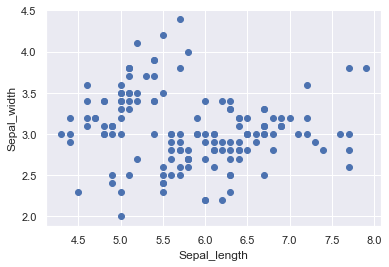

In [7]:
plt.scatter(data['sepal_length'],data['sepal_width'])
plt.xlabel('Sepal_length')
plt.ylabel('Sepal_width')
plt.show()

# Standardize the variables

Import and use the <i> method </i> function from sklearn to standardize the data. 

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

# Clustering (scaled data)

## Take Advantage of the Elbow Method

### WCSS

In [17]:
wcss = []

for i in range(1,9):
    kmeans = KMeans(i)
    kmeans.fit(scaled_data)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### The Elbow Method

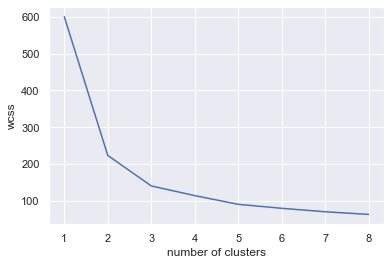

In [18]:
plt.plot(range(1,9),wcss)
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

Seems 2 or 3 clusters are best

### 2 clusters

In [19]:
kmeans = KMeans(2)
kmeans.fit(scaled_data)

KMeans(n_clusters=2)

In [20]:
clusters = kmeans.fit_predict(scaled_data)

In [21]:
data_with_2_clusters = data.copy()
data_with_2_clusters['clusters'] = clusters
data_with_2_clusters.head()

,sepal_length,sepal_width,petal_length,petal_width,clusters
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


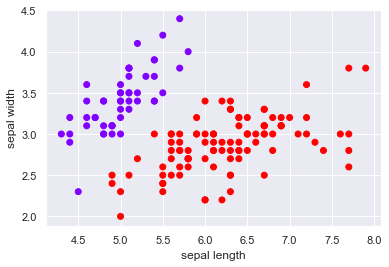

In [22]:
plt.scatter(data_with_2_clusters['sepal_length'],data_with_2_clusters['sepal_width'],c=data_with_2_clusters['clusters'],cmap='rainbow')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

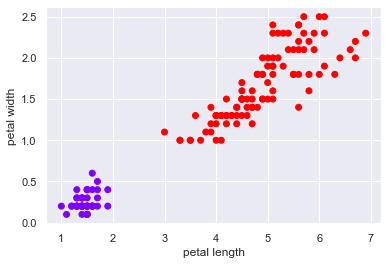

In [41]:
plt.scatter(data_with_2_clusters['petal_length'],data_with_2_clusters['petal_width'],c=data_with_2_clusters['clusters'],cmap='rainbow')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

# 3 clusers

In [31]:
kmeans3 = KMeans(3)
kmeans3.fit(scaled_data)

KMeans(n_clusters=3)

In [36]:
clusters3 = kmeans3.fit_predict(scaled_data)
clusters3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [37]:
data_with_3_clusters = data.copy()
data_with_3_clusters['clusters3'] = clusters3
data_with_3_clusters.head()

,sepal_length,sepal_width,petal_length,petal_width,clusters3
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


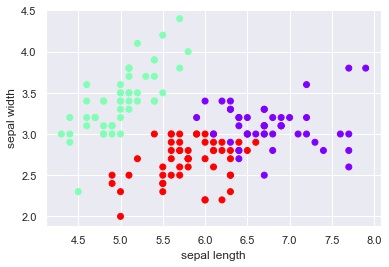

In [38]:
plt.scatter(data_with_3_clusters['sepal_length'],data_with_3_clusters['sepal_width'],c=data_with_3_clusters['clusters3'],cmap='rainbow')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

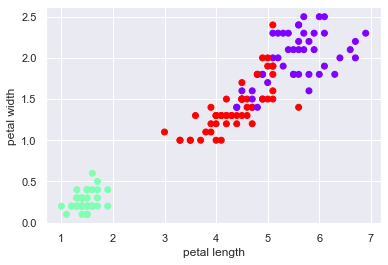

In [40]:
plt.scatter(data_with_3_clusters['petal_length'],data_with_3_clusters['petal_width'],c=data_with_3_clusters['clusters3'],cmap='rainbow')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()